In [1]:
# Standard Packages
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import sys , os

In [2]:
# Custom modules
sys.path.append(r'C:\Users\Ishigami_Group\Documents\GitHub\NanoscoPy') # Specifies custom module directory
import nanoscopy as nano

In [3]:
file_path = r'C:\Users\Ishigami_Group\Downloads\AFM\AFM\2021-09-15_ds-1_wse2(sl333)_exf_histogram_013.dat'

In [4]:
data = pd.read_csv(file_path , sep = '\t' , header = None)
data.head()

,0,1
0,0.000000,1.0
1,0.136518,0.0
2,0.273036,0.0
3,0.409554,0.0
4,0.546072,0.0


In [6]:
spec = nano.raman.analysis.Spectrum(data.to_numpy())

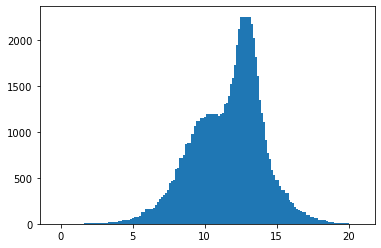

In [7]:
plt.bar(spec.data_x, spec.data_y)
plt.show()

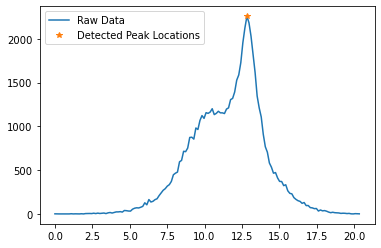

In [21]:
# Locate the peaks in the data and determine parameter values.
peak_indices , peak_properties = spec.locate_peaks(wlen=10, width=3)

# Generate a plot to visualize the peak detection results
plt.plot(spec.data_x,spec.data_y,label='Raw Data')
plt.plot(spec.data_x[peak_indices],spec.data_y[peak_indices],'*',label='Detected Peak Locations')
plt.legend()

new_model_parameters = spec.generate_model_parameters(peak_indices,peak_properties)

spec.make_composite_model(new_model_parameters)

In [29]:
model_WSe2 = [
    {'name':'left',
    'type': 'Gaussian',
    'center': {'value':10},
    'height': {'value':1200},
    'FWHM': {'value':5} 
    } ,
    {'name':'right',
    'type': 'Lorentzian',
    'center': {'value':13},
    'height': {'value':2200},
    'FWHM': {'value':3} 
    }
    ]

(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

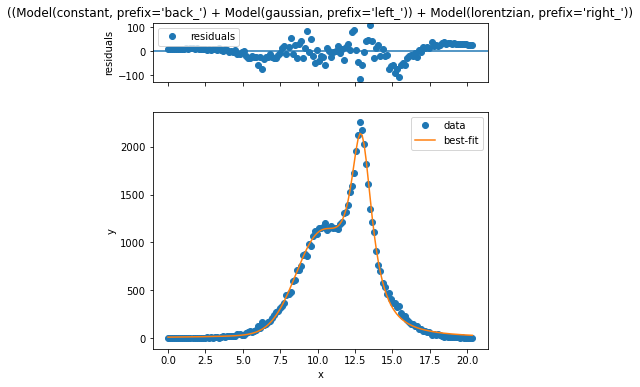

In [30]:
spec.make_composite_model(model_WSe2)
spec.fit_spectrum()
spec.results.plot()

In [31]:
# Print out the fit report generated by lmfit
print(spec.results.fit_report())

[[Model]]
    ((Model(constant, prefix='back_') + Model(gaussian, prefix='left_')) + Model(lorentzian, prefix='right_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 57
    # data points      = 150
    # variables        = 7
    chi-square         = 173037.333
    reduced chi-square = 1210.05128
    Akaike info crit   = 1071.59410
    Bayesian info crit = 1092.66855
##  Warning: uncertainties could not be estimated:
    back_c:           at initial value
    back_c:           at boundary
[[Variables]]
    back_c:           1.0000e-06 (init = 1e-06)
    left_amplitude:   3779.26755 (init = 6386.802)
    left_center:      10.0966857 (init = 10)
    left_sigma:       1.61124585 (init = 2.123305)
    right_amplitude:  5493.43840 (init = 10367.26)
    right_center:     12.9228586 (init = 13)
    right_sigma:      0.90185675 (init = 1.5)
    left_fwhm:        3.79419395 == '2.3548200*left_sigma'
    left_height:      935.741550 == '0.3989423*left_amplitude/max

In [48]:
results = spec.results
lc = results.values['left_center']
rc = results.values['right_center']
delta_c = rc - lc
delta_c

2.8261729496836114